## Лабораторная работа 3
#### Выполнил: Граур Арсений `5130901/10203`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ThinkDSP.code.thinkdsp import decorate

### Упражнение 1

Возьмем пример утечки прямо из книги, когда период вместо 30 равен 30.25 - компоненты около пика "размазаны".

In [2]:
from ThinkDSP.code.thinkdsp import SinSignal, decorate

signal = SinSignal(freq=440)
duration = signal.period * 30.25
wave = signal.make_wave(duration)
spectrum = wave.make_spectrum()

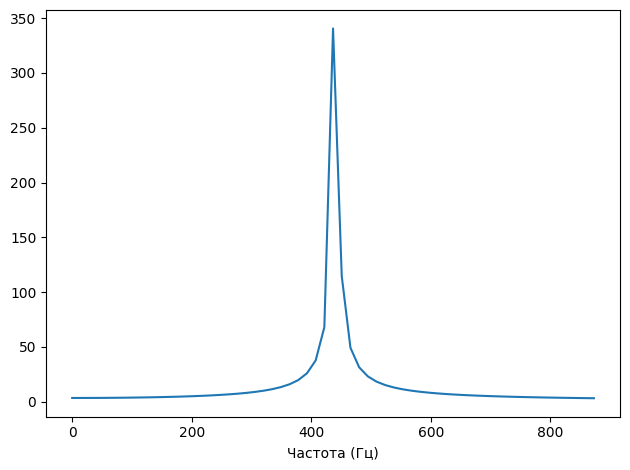

In [3]:
spectrum.plot(high=880)
decorate(xlabel='Частота (Гц)')

Посмотрим какие окна предоставляет NumPy

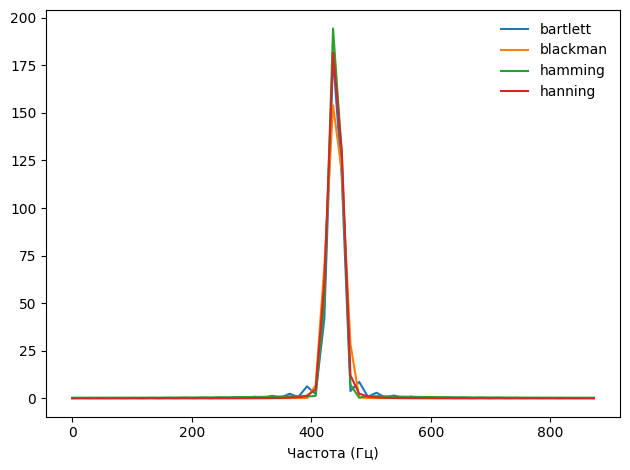

In [4]:
for window_func in [np.bartlett, np.blackman, np.hamming, np.hanning]:
    wave = signal.make_wave(duration)
    wave.ys *= window_func(len(wave.ys))

    spectrum = wave.make_spectrum()
    spectrum.plot(high=880, label=window_func.__name__)

decorate(xlabel='Частота (Гц)')

Все окна хорошо справляются с уменьшением утечек. Bartlett оставляет остаточную звонкость.

### Упражнение 2

Создадим класс SawtoothChirp

In [6]:
from ThinkDSP.code.thinkdsp import Chirp
from ThinkDSP.code.thinkdsp import normalize, unbias

PI2 = 2 * np.pi

class SawtoothChirp(Chirp):
    def evaluate(self, ts):
        freqs = np.linspace(self.start, self.end, len(ts))
        dts = np.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys =  normalize(unbias(frac), self.amp)
        return ys

Вот как он звучит

In [7]:
signal = SawtoothChirp(start=220, end=880)
wave = signal.make_wave(duration=1, framerate=4000)
wave.apodize()
wave.make_audio()

Вот спектрограмма

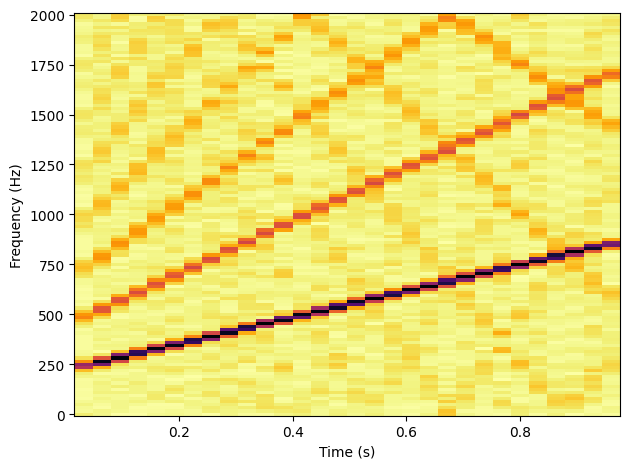

In [8]:
sp = wave.make_spectrogram(256)
sp.plot()
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

### Упражнение 3

Создадим пилообразный чирп и послушаем его.


In [9]:
signal = SawtoothChirp(start=2500, end=3000)
wave = signal.make_wave(duration=1, framerate=20000)
wave.make_audio()

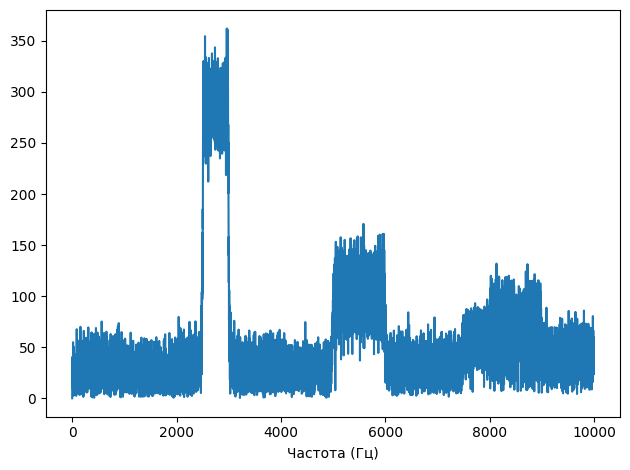

In [10]:
wave.make_spectrum().plot()
decorate(xlabel='Частота (Гц)')

### Упражнение 4

In [17]:
from ThinkDSP.code.thinkdsp import read_wave

wave = read_wave('res/rhapblue11924.wav')
wave.make_audio()

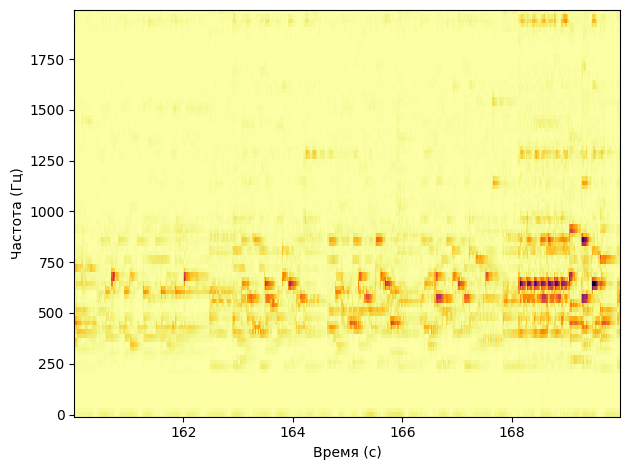

In [32]:
segment = wave.segment(start=160, duration=10)
segment.make_spectrogram(512).plot(high=2000)
decorate(xlabel='Время (с)', ylabel='Частота (Гц)')

### Упражнение 5

Создадим класс TromboneGliss

In [34]:
class TromboneGliss(Chirp):
    def evaluate(self, ts):
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts))
        freqs = 1 / lengths
        
        dts = np.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys

Построим сигнал от высокой частоты к нижней

In [36]:
low = 262
high = 349
signal = TromboneGliss(high, low)
wave1 = signal.make_wave(duration=1)
wave1.apodize()
wave1.make_audio()

И вторую часть

In [37]:
signal = TromboneGliss(low, high)
wave2 = signal.make_wave(duration=1)
wave2.apodize()
wave2.make_audio()

Соединим их

In [38]:
wave = wave1 | wave2
wave.make_audio()

Спектрограмма

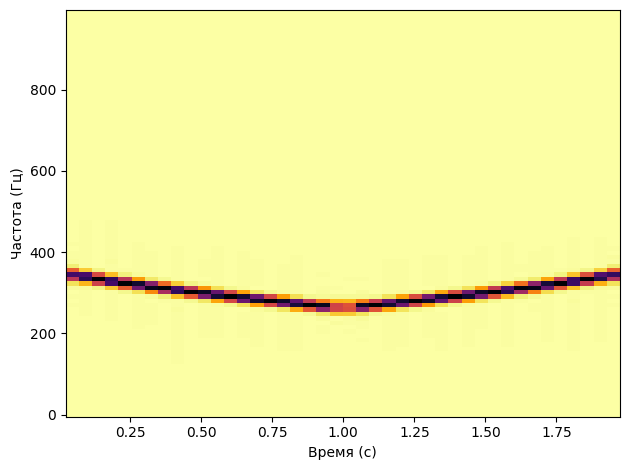

In [39]:
sp = wave.make_spectrogram(1024)
sp.plot(high=1000)
decorate(xlabel='Время (с)', ylabel='Частота (Гц)')

### Упражнение 6

Загрузим аудио с произношением гласных английских букв

In [40]:
wave = read_wave('ThinkDSP/code/87778__marcgascon7__vocals.wav')
wave.make_audio()

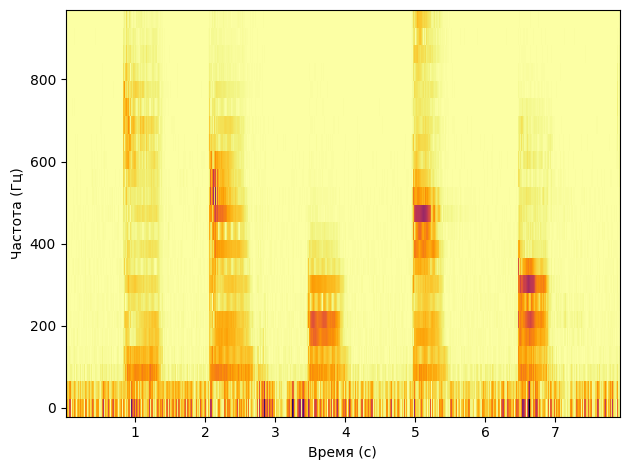

In [41]:
wave.make_spectrogram(1024).plot(high=1000)
decorate(xlabel='Время (с)', ylabel='Частота (Гц)')

Все буквы различимы на спектрограмме, и по ней же видно, что они отличаются